# King County House Price Prediction

## Abstract

Property price value have important impact on individual, families, business and governments.
In this notebook, we have analysed the data from king country home feature dataset and tried to predict the home price based on the various features available in dataset.
We have considered both aspect of data science problem: Classification and Regression problem. For classification, Target feature converted into target categorical value which "HIGH" or "LOW" by considering the mean value as boundary to decide the category. In classification, we have tried to categorize the house price whether its "LOW" or "HIGH" with supervised models like RandomForestClassifier, XGBoostClassifier and Logistic regression. Models were also train to get best parameters using the hyper-parameter tuning. In regression, we have used RandomForestRegressor, XGBoostRegressor, multiple linear regression, ridge regression and AdaBoost Regressor model to access the data and tried to predict the price of house.
In classification, after comparing the results from all the classification models, we found that XGBoostClassifier stand out among other classifiers with accuracy of "91.15%". On other end for regression models, XGB regressor provided best estimate for house price for current dataset with accuracy of "xxxxx".

## Dataset:

* King County House Price prediction [https://www.kaggle.com/harlfoxem/housesalesprediction/home](https://www.kaggle.com/harlfoxem/housesalesprediction/home)  This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.  
* 19 house features plus the price and the id columns, along with 21613 observations.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from pprint import pprint
%matplotlib inline

#### Import king county price dataset using read_csv function.

In [4]:
features = pd.read_csv("../king_county_cleansed.csv")
classification_models = {}
regression_models = {}
# remove the index column since it is not needed down the line.
features.drop(['index'],axis=1,inplace=True) 
features.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,437500,3,2.25,1970,35100,0,1970,0,1977,0,...,0,0,0,0,0,0,0,0,0,0
1,790000,3,2.50,2600,4750,0,1700,900,1951,0,...,0,0,0,0,0,0,0,0,0,0
2,675000,5,2.50,2820,67518,0,2820,0,1979,0,...,0,0,0,0,0,0,0,0,0,0
3,555000,4,2.50,3310,6500,0,3310,0,2012,0,...,0,0,0,0,0,0,0,0,0,0
4,440000,4,2.25,2160,8119,0,1080,1080,1966,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
features.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,84.402258,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,401.679240,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Check
* In any dataset, there are chances that features may be correlated to each other which can create problem to get better accuracy of the any machine learning model. Below code shows the heat map in which correlation can be seen amoung the features of the dataset.
* corr() function can be used to compute pairwise correlation of features by exculiding null/NA values.
* Below code will use corr() function to compute the correlation amount the features of king county dataset and create mask with the same shape as corr dataframe. Also make all indices of mask's upper triangle as "True". Then use corr dataframe and mask to create heatmap which shows the correlation between features.

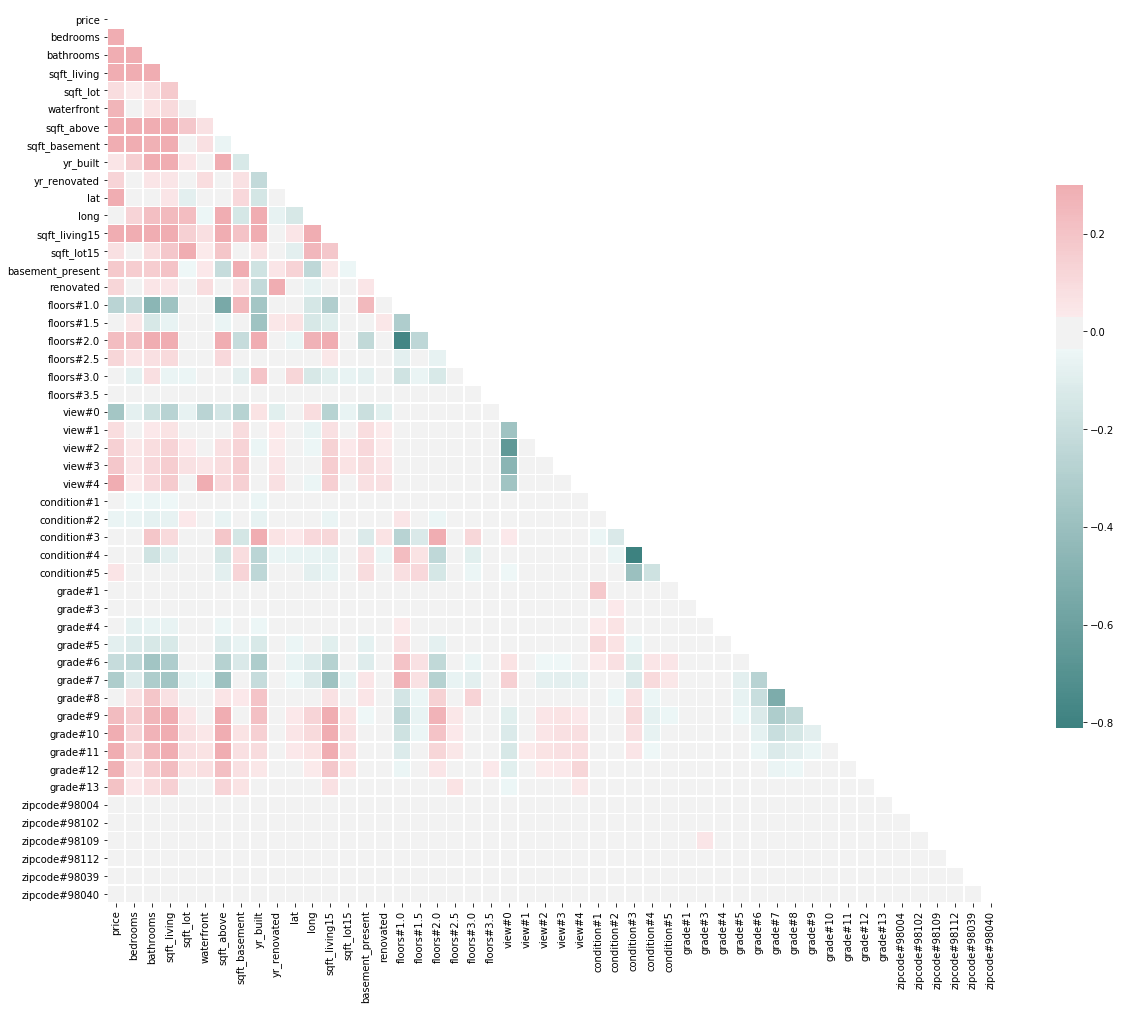

In [6]:
corr = features.corr()

#Create mast with zeros as same shape as corr dataframe.
mask = np.zeros_like(corr, dtype=np.bool)

#Assign true value to upper triangle of mask
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# use mask to hide the values in the upper triangle of heatmap.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

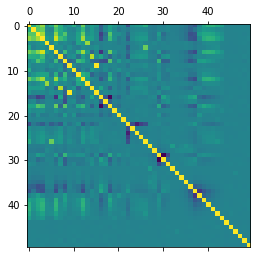

In [7]:
# Display correlation matrix as array matrix using matshow function.
plt.matshow(features.corr())

In [8]:
# Calculating the median value of "price" column.
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


In order to perform classification tasks, I have converted the price quantitative variable to a binary classification variable with HIGH price as 1 and LOW price as -1(For logistic regression I am taking LOW as 0).
Adding column to dataframe for holding categorical price value : HIGH/LOW
All values < median are LOW and Values >= median are HIGH.

In [9]:
# use lambda function to check whether the value of indice is greater than median value or not and assign as -1 or 1.
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


# Part A

### Random forest classifier
Random forest classifier is ensemble method for classification that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees 

In [10]:
# import train_test_split function which use to split the data.
from sklearn.model_selection import train_test_split


In Below code, I have done few changes than the previous code. New code will be able to create X dataframe automatically based on the target variable provided in the first line. In this case, we no need to provide all the feature names in the list varible and add in x_features since it will be automatically taken from the features.columns function.

In [11]:
#target variable from the dataset.
y=features['price_cat']  # Labels

#drop target value from dataframe
features.drop(['price_cat','price'],axis=1,inplace=True)

# features from the kc dataset
X_features = features.columns

X = features[X_features]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Implement basic random forest classifier algorithm with only one parameter - n_estimators

In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_base=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_base.fit(X_train,y_train)

y_pred_base=clf_base.predict(X_test)


Use GridSearchCV algorithm for hyperparameter tunning on random forest classifier. Load all the best parameters into one dictonary which can be used in below code.

In [13]:
from sklearn.model_selection import GridSearchCV

# prameter grid for hyperparameter tunning
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}

#Random forest classifier
clf=RandomForestClassifier()

# Hyperparameter tunning using GridSearchCV function
clf_grid = GridSearchCV(clf,param_grid,cv = 3, n_jobs = -1, verbose = 2)

#Train the model using the training sets 
clf_grid.fit(X_train,y_train)

best_param = clf_grid.best_params_
print(best_param)
print(clf_grid.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  8.7min finished


{'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 2000}
0.903562694163527


Use best parameters after hyper-parameter tunning into random forest classifier to generate more accurate model.

In [14]:
boot = best_param.get('bootstrap')
max_f = best_param.get('max_features')
min_sl = best_param.get('min_samples_leaf')
min_ss = best_param.get('min_samples_split')
n_esti = best_param.get('n_estimators')
#print(max_d,min_s,n_esti)

#Random forest classifier using best parameter which are available from hyperparameter tunning
clf_grid=RandomForestClassifier(bootstrap = boot, min_samples_leaf = min_sl,n_estimators= n_esti,max_features=max_f,min_samples_split=min_ss)

#Train the model using the training sets 
clf_grid.fit(X_train,y_train)

# get the predicted value for the x_test data using train model
y_pred_grid=clf_grid.predict(X_test)

Use RandomizedSearchCV algorithm to do hyper-parameter tunning.

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [5, 10],
               'min_samples_leaf': [2, 4]}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1);
# Fit the random search model
clf_random.fit(X_train,y_train);
clf_random.best_params_
best_random = clf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


Use best parameters after RandomizedSearchCV to get more accurate random forest classifier model.



In [16]:
max_d = best_param.get('max_depth')
max_f = best_param.get('max_features')
min_sl = best_param.get('min_samples_leaf')
min_ss = best_param.get('min_samples_split')
n_esti = best_param.get('n_estimators')

clf_random=RandomForestClassifier(max_depth = max_d, min_samples_leaf = min_sl,n_estimators= n_esti,max_features=max_f,min_samples_split=min_ss)

#Train the model using the training sets 
clf_random.fit(X_train,y_train)

# get the predicted value for the x_test data using train model
y_pred_random=clf_random.predict(X_test)

Display the accuracy of base, grid and random model from the y_pred using accuracy_score function.

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy of base model:",metrics.accuracy_score(y_test, y_pred_base))
print("Accuracy of grid model:",metrics.accuracy_score(y_test, y_pred_grid))
print("Accuracy of random model:",metrics.accuracy_score(y_test, y_pred_random))

Accuracy of base model: 0.8991363355953116
Accuracy of grid model: 0.9017581739666872
Accuracy of random model: 0.899599012954966


ROC is also one of the way to accessing the model. Below function will help to create ROC curve for all three model and will give us the accuracy of the model.

In [18]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [22]:
base_md = str(evaluate(clf_base,X_train,y_train, X_test)) 
grid_md = str(evaluate(clf_grid,X_train,y_train, X_test))              
rand_md = str(evaluate(clf_random,X_train,y_train, X_test))  

classification_models["RandomForestClassifier_BaseModel"] = base_md
classification_models["RandomForestClassifier_GridSearchModel"] = grid_md
classification_models["RandomForestClassifier_RandomModel"] = rand_md              
              
print('AUC for base search model : ' + base_md )
print('AUC for best grid search model : ' + grid_md)
print('AUC for best random search model : ' + rand_md )

AUC for base search model : 0.900922246533488
AUC for best grid search model : 0.9004880880929643
AUC for best random search model : 0.8989434621618978


Examine the feature importance of the given dataset for base model and select top 10 feature from the dataset.

In [24]:
feature_imp = pd.Series(clf_base.feature_importances_,index=X_features).sort_values(ascending=False)
top_features = feature_imp.head(10)
top_features

lat              0.278237
sqft_living      0.119578
sqft_living15    0.097502
sqft_above       0.074511
long             0.054778
sqft_lot15       0.050581
yr_built         0.048408
sqft_lot         0.047358
bathrooms        0.037853
grade#7          0.027653
dtype: float64

No handles with labels found to put in legend.


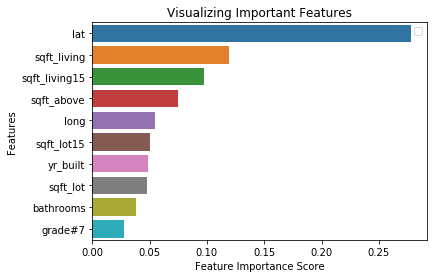

In [25]:
# Creating a bar plot and plot first 10 important features.
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XGBoost 

XGBoost(Gradient boosting) is machine learning techiques for classification and regression problem which produces prediction model in the form of ensemble of weak prediction models.
* Below mention is simple gradient boosting algorithm which default pramaeters.

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.19%


Now, Its time to tune the model with hyper-parameter tunning.
GridSearchCV will try to get best parameter for the xgboostclassifier using stratified k-fold cross validation.
In stratified k-fold cross-validation, the folds are selected so that the mean response value is approximately equal in all the folds. 

Best: -0.210345 using {'n_estimators': 350}
-0.256854 (0.009619) with: {'n_estimators': 50}
-0.229709 (0.010335) with: {'n_estimators': 100}
-0.220157 (0.010994) with: {'n_estimators': 150}
-0.215206 (0.011358) with: {'n_estimators': 200}
-0.212605 (0.011581) with: {'n_estimators': 250}
-0.211100 (0.012104) with: {'n_estimators': 300}
-0.210345 (0.012436) with: {'n_estimators': 350}


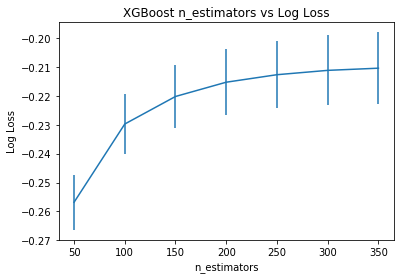

In [27]:
n_estimators = range(50, 400, 50)

param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgBoostClassifierModel, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#storing mean,std and params values in the variable
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# plot errorbar to check the relation between number of estimators and logg loss
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=350 resulting in a log loss of -0.212169, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

## Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [28]:
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgBoostClassifierModel, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#storing mean,std and params values in the variable
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.7min finished


Best: -0.204778 using {'max_depth': 7}
-0.329168 (0.008187) with: {'max_depth': 1}
-0.229709 (0.010335) with: {'max_depth': 3}
-0.210490 (0.010693) with: {'max_depth': 5}
-0.204778 (0.013191) with: {'max_depth': 7}
-0.209504 (0.016570) with: {'max_depth': 9}


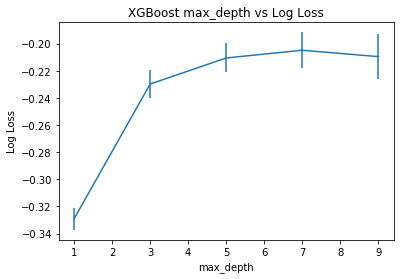

In [29]:
# plot errorbar to check the relation between number of estimators and logg loss
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4*4*10 or 160 models will be trained and evaluated.


In [30]:
# grid search
#model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgBoostClassifierModel, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1);
grid_result = grid_search.fit(X_train, y_train);
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 25.0min finished


Best: -0.205820 using {'max_depth': 6, 'n_estimators': 250}
-0.209509 (0.016735) with: {'max_depth': 6, 'n_estimators': 350}
-0.207491 (0.015969) with: {'max_depth': 6, 'n_estimators': 300}
-0.205820 (0.014732) with: {'max_depth': 6, 'n_estimators': 250}
-0.211796 (0.018128) with: {'max_depth': 6, 'n_estimators': 400}
-0.215920 (0.017522) with: {'max_depth': 7, 'n_estimators': 350}
-0.212177 (0.017015) with: {'max_depth': 7, 'n_estimators': 300}
-0.209351 (0.016198) with: {'max_depth': 7, 'n_estimators': 250}
-0.219669 (0.018685) with: {'max_depth': 7, 'n_estimators': 400}
-0.223902 (0.020311) with: {'max_depth': 8, 'n_estimators': 350}
-0.219604 (0.019763) with: {'max_depth': 8, 'n_estimators': 300}
-0.215278 (0.018474) with: {'max_depth': 8, 'n_estimators': 250}
-0.228806 (0.021182) with: {'max_depth': 8, 'n_estimators': 400}
-0.234289 (0.022010) with: {'max_depth': 9, 'n_estimators': 350}
-0.228615 (0.021128) with: {'max_depth': 9, 'n_estimators': 300}
-0.222336 (0.020576) with: {'m

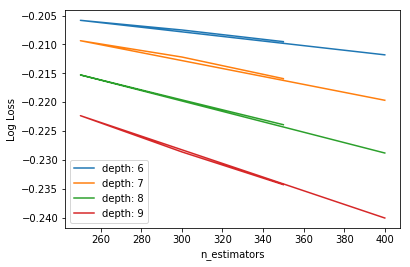

In [31]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=5).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation  is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters

In [32]:
model = XGBClassifier(max_depth=6, n_estimators=250)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [34]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
XGBoost_auc = str(evaluate(model, X_train,y_train, X_test))
print('AUC for the XGBoost model is: ' + XGBoost_auc )
classification_models["XGBoostClassifier_BestModel"] = XGBoost_auc

AUC for the XGBoost model is: 0.9114763974992168


## Thus we got a higher ROC for XGBoost model than the bagging models tried earlier

## Classification with Logistic Regression

Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

* Which independent variables are important?
* Is there multi-colinearity?
* How does it compare to the the models in Part A?

We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

We have consider onl few features from the dataset to train the model based on the importance of the features.

In [38]:
features = pd.read_csv("../king_county_cleansed.csv")
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)
price_cat_log=features['price_cat_log']
y_log=price_cat_log
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [39]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)

print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        20:22:46   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

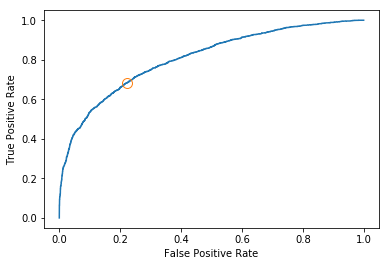

In [41]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [43]:
from sklearn import metrics
log_auc = str(metrics.auc(falsepos, truepos))
print("AUC for the logistic regression: " + log_auc)
classification_models["LogisticRegression_Model"] = log_auc

AUC for the logistic regression: 0.8078695178147917


## As compared to Models in Part A, the accuracy of the Logistic Regression model is less.

## Regression with Trees 
Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a regression problem.
Answer the following questions for each supervised learner:

* Which hyper-parameters are important?    
* What hyper-parameter values work best?   
* Which supervised learner works best on the test data?  

### Random Forest based Regression

To look at the available hyperparameters, we can create a random forest and examine the default values.

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [46]:
# features = pd.read_csv("../king_county_cleansed.csv")
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [47]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [48]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1);
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


In [49]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)
regression_models["RandomForestRegressor_BaseModel"] = base_accuracy

Model Performance
Average Error: 75289.8578 degrees.
Accuracy = 85.82%.


In [50]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)
regression_models["RandomForestRegressor_RandomModel"] = random_accuracy

Model Performance
Average Error: 71417.0004 degrees.
Accuracy = 86.53%.


From above results, we can conclude that after hyper parameter tunning using randomized search cv, the accuracy of the model got increase by 1%.

### Grid Search with Cross Validation

In [52]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
#grid_search.best_params_
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)
regression_models["RandomForestRegressor_GridSearchModel"] = grid_accuracy

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 13.6min finished


Model Performance
Average Error: 89114.8277 degrees.
Accuracy = 82.10%.


After getting best random forest regressor model using grid search cv algorithm, we got accuracy as 82.58% which is less accurate than the model which we got from randomized search cv model.

## XGBoost (eXtreme Gradient Boosting)
Lets implement XGBoost regressor and analyze the model accuracy with it.


In [55]:
from xgboost import XGBRegressor
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)
regression_models["XGBoostRegressor_BasehModel"] = base_accuracy

Model Performance
Average Error: 82602.5286 degrees.
Accuracy = 83.99%.


Do hyper parameter tunning for xgboost regressor using grid search cv function. stratified kfold cv is used as type of cross-validation imlemented in grid search cv function.

In [ ]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 14.2min finished
C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.850324 using {'max_depth': 4, 'n_estimators': 400}
0.847977 (0.036010) with: {'max_depth': 4, 'n_estimators': 300}
0.849291 (0.035877) with: {'max_depth': 4, 'n_estimators': 350}
0.850324 (0.035580) with: {'max_depth': 4, 'n_estimators': 400}
0.845845 (0.041506) with: {'max_depth': 5, 'n_estimators': 300}
0.846573 (0.041266) with: {'max_depth': 5, 'n_estimators': 350}
0.847344 (0.041229) with: {'max_depth': 5, 'n_estimators': 400}
0.842159 (0.042686) with: {'max_depth': 6, 'n_estimators': 300}
0.842314 (0.042810) with: {'max_depth': 6, 'n_estimators': 350}
0.842625 (0.042761) with: {'max_depth': 6, 'n_estimators': 400}
0.839854 (0.047012) with: {'max_depth': 7, 'n_estimators': 300}
0.839824 (0.047087) with: {'max_depth': 7, 'n_estimators': 350}
0.839570 (0.047134) with: {'max_depth': 7, 'n_estimators': 400}


In [57]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)
regression_models["XGBoostRegressor_GridSearchModel"] = best_accuracy

Model Performance
Average Error: 68566.0422 degrees.
Accuracy = 86.93%.


### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

Evaluating the regresision models

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [59]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 141295.33


In [60]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 128228.77


From the above results, XGBoost regressor model have the more accuracy(87.44%) than random forest regressor(86.55%). Also, RMSE of XGBoost model is less than the random forest regressor model.

# Part D

## Multiple Linear Regression

Try multiple linear regression model to access the model and see the accuracy.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
y_pred_reg = linear_model.predict(X_test_reg)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_reg, y_pred_reg))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_reg, y_pred_reg))
lin_acc = evaluate_reg(linear_model, X_test_reg, y_test_reg)
regression_models["LinearRegression_Model"] = lin_acc

Mean squared error: 35173215482.42
Variance score: 0.73
Model Performance
Average Error: 119351.7397 degrees.
Accuracy = 76.47%.


Using linear regression model for the dataset, the variance score(r^2) is 74% which less accurate than XGBoost and Random forest regressor model.

Now Try to create one GLM model like ridge regression model throgh which we might get more accuracy than simple multiple regression model.

We will try to fit Ridge regressin model to dataset and try to access the accuracy of the model again other type of ensemble models.

For Ridge regression model, we need to have value of alpha. And to get best value of alpha, Use RidgeCV function.

In [62]:
from sklearn.linear_model import RidgeCV, Ridge
ridge_cv = RidgeCV([0.001,0.0001,0.00001,5,0.1,1,10,50,100])
model_cv = ridge_cv.fit(X_train_reg, y_train_reg)
model_cv.alpha_

0.001

In [63]:
ridge_model = Ridge(model_cv.alpha_)
ridge_model.fit(X_train_reg, y_train_reg)
y_pred_rid = ridge_model.predict(X_test_reg)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_reg, y_pred_rid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_reg, y_pred_rid))
ridge_acc = evaluate_reg(ridge_model, X_test_reg, y_test_reg)
regression_models["RidgeRegression_Model"] = ridge_acc

Mean squared error: 35175167082.14
Variance score: 0.73
Model Performance
Average Error: 119352.7074 degrees.
Accuracy = 76.47%.


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.773712e-17
  overwrite_a=True).T


# Part E

### AdaBoostRegressor

We have used one more supervised learning model which is AdaBoostRegressor model to predict the target variable. 

In [76]:
from sklearn.ensemble import AdaBoostRegressor
param_ada_grid = {
    'loss': ['linear', 'square', 'exponential'],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'n_estimators': [500, 1000]
}

ada_boost_mdl = AdaBoostRegressor()
grid_ada_boost = GridSearchCV(ada_boost_mdl, param_ada_grid)
grid_ada_boost.fit(X_train_reg, y_train_reg)
best_params = grid_ada_boost.best_params_
print(grid_ada_boost.best_score_)

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6630554373592941


In [77]:
los = best_params.get('loss')
lr = best_params.get('learning_rate')
n_esti = best_params.get('n_estimators')

ada_best_param_mdl = AdaBoostRegressor(loss=los, learning_rate=lr, n_estimators=n_esti)
ada_best_param_mdl.fit(X_train_reg, y_train_reg)
y1_pred_ada = ada_best_param_mdl.predict(X_test_reg)

In [78]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_reg, y1_pred_ada))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_reg, y1_pred_ada))
ada_acc = evaluate_reg(ada_best_param_mdl, X_test_reg, y_test_reg)
regression_models["AdaBoostRegressor_Model"] = ada_acc

Mean squared error: 49614979005.21
Variance score: 0.62
Model Performance
Average Error: 142104.4325 degrees.
Accuracy = 69.81%.


From the accuracy of adaboosting regressor, we can say that the model doesn't perform well for the current dataset. The accuracy is very less than all other model.

Two dataframe has been created as mention below which will contain models and thier respective score. 

In [ ]:
classification_df = pd.DataFrame(list(classification_models.items()),columns=['Model','Auc_Score'])


In [80]:
regression_df = pd.DataFrame(list(regression_models.items()),columns=['Model','Accuracy'])

# Conclusion

After trying multiple models for classification and regression problem for current dataset, below are my findings from this notebook.
* Classification of "HIGH" or "LOW" price:
	* Below mention table shows auc score for all the classifiers tried in this notebook.

In [81]:
classification_df.sort_values(by=['Auc_Score'], ascending = False)

,Model,Auc_Score
3,XGBoostClassifier_BestModel,0.9114763974992168
0,RandomForestClassifier_BaseModel,0.900922246533488
1,RandomForestClassifier_GridSearchModel,0.9004880880929643
2,RandomForestClassifier_RandomModel,0.8989434621618978
4,LogisticRegression_Model,0.8078695178147917


* Price prdiction(Regression):
	* Below mention table shows accuracy for all the regressors used in this notebook.

In [82]:
regression_df.sort_values(by=['Accuracy'], ascending = False)

,Model,Accuracy
4,XGBoostRegressor_GridSearchModel,86.928500
1,RandomForestRegressor_RandomModel,86.526732
0,RandomForestRegressor_BaseModel,85.817698
3,XGBoostRegressor_BasehModel,83.988012
2,RandomForestRegressor_GridSearchModel,82.098468
5,LinearRegression_Model,76.467936
6,RidgeRegression_Model,76.467756
7,AdaBoostRegressor_Model,69.806903


from table, we can see that XGBoostRegressor performs best for predicting the price value for the current dataset. In both the cases, XGBoosting algorithm perform well to predict the target variable for the king county house dataset.

# Contributions

10-15% code has been changes or added in this notebook by the author. 
The code which is added is Part D and Part E which inlcude model fitting with ridge regression model and one suprvised learning model called adaboosting regressor.
Two dataframe has been created to store the all results of model fitting through out this notebook and display the same during conclusion by sorting algorithm result by accuracy.
Code which is change in the notebook is mention below:
    * Code has been changed in dataframe loading by removing the target variable from the dataset.
    * Rather than giving the column list to dataframe X and Y, I have optimize it.
    * During hyper-parameter tunning, I have authomate the best param selection in hyper-parameter tunning and use the same parameters to train respective supervised model.
    * Provided proper varible name at various places
    * Remove few redudant model fitting code in XGBoostClassifier.

# Citations


* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

* https://xgboost.readthedocs.io/en/latest/python/python_api.html

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

* https://en.wikipedia.org/wiki/Random_forest

* https://en.wikipedia.org/wiki/Gradient_boosting

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* https://www.kaggle.com/harlfoxem/housesalesprediction    

# License

MIT License

Copyright (c) 2018 Akshay Patel

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.